*Page and Latex Commands*
$\newcommand{\C}{\mathbb{C}}
\renewcommand{\R}{\mathbb{R}}
\renewcommand{\Z}{\mathbb{Z}}
\renewcommand{\N}{\mathbb{N}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\mP}{\mathcal{P}}
\newcommand{\bp}{\begin{pmatrix}}
\newcommand{\ep}{\end{pmatrix}}
$

In [1]:
from jupyterthemes import jtplot
jtplot.style()

import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import sys

# Self Defined Functions
sys.path.append('..\lib')

from findiff import *
from opt import *
from krot import *

# KROT Approximate Solutions for Lambda

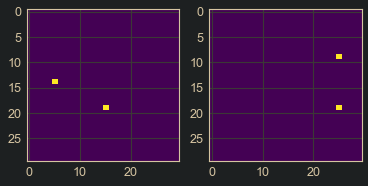

In [2]:
#GRID
n = m = 5*6
h=1/(n-1)
dt=1
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[n//2,n//6] = 1
rho[n//3,3*n//6] = 1
# Final Distribution
sigma = np.zeros((n,n))
sigma[n//3,5*n//6] = 1
sigma[2*n//3,5*n//6] = 1
f = sigma.flatten()-rho.flatten()

#VARIABLES
Gc=np.ones((n,m))

#DIFFERENCE OPERATORS
Dx = D2xFE(n,m, bc = BC, matrix=True)
Dy = D2yFE(n,m, bc = BC, matrix=True)
Div = np.hstack((Dx.T,Dy.T))
Grad = np.vstack((Dx,Dy))


plt.subplot(121)
plt.imshow(rho[::-1])
plt.subplot(122)
plt.imshow(sigma[::-1])


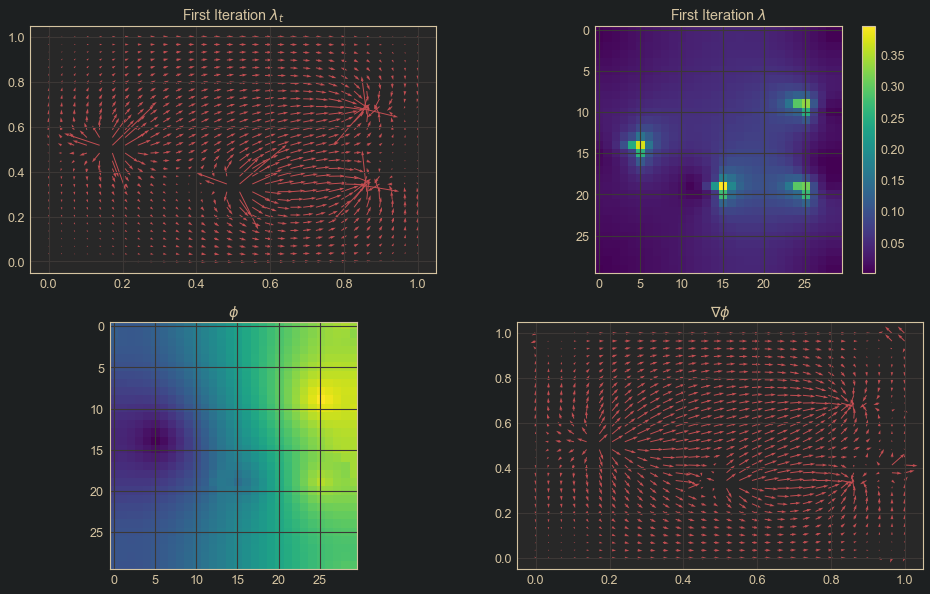

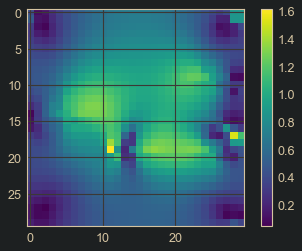

In [3]:
#FIRST STEP
lam_t = cp.Variable(n*n*2)
prob = cp.Problem(cp.Minimize(cp.sum_squares(Div@lam_t-f)))
prob.solve()
lam_t = lam_t.value.reshape(2,n*n)

#SCALE LAMBDA
norm = np.array([np.linalg.norm(_lam_t) for _lam_t in lam_t.T])
lam = norm
lam_p=lam
lam = np.diag(np.append(lam,lam))

#SECOND STEP
A = (lam@Grad)
phi = cp.Variable(n*n)
prob = cp.Problem(cp.Minimize(cp.sum_squares(A@phi-lam_t.reshape(2*n*n))))
prob.solve()
phi = phi.value.reshape(n,n)
Gphi = (Grad@phi.reshape(n*n)).reshape(2,n*n)

norm = np.array([np.linalg.norm(gphi) for gphi in Gphi.T])

#PLOTTING
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.quiver(xx,yy,lam_t[0],lam_t[1], color='r')
plt.title('First Iteration $\\lambda_t$')
plt.subplot(222)
plt.imshow(lam_p.reshape(n,n)[::-1])
plt.title('First Iteration $\\lambda$')
plt.colorbar()
plt.subplot(223)
plt.title('$\\phi$')
plt.imshow(phi[::-1])
plt.subplot(224)
plt.title('$\\nabla\\phi$')
plt.quiver(xx,yy,Gphi[0], Gphi[1],color='r')
plt.show()

plt.imshow(norm.reshape((n,n))[::-1])
plt.colorbar()

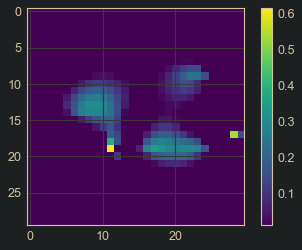

In [4]:
lam = norm - 1*np.ones(len(norm))
lam = lam.clip(min=.01)
lam_p = lam

plt.imshow(lam.reshape((n,m))[::-1])
plt.colorbar()

lam = np.diag(np.append(lam,lam))

### More Examples

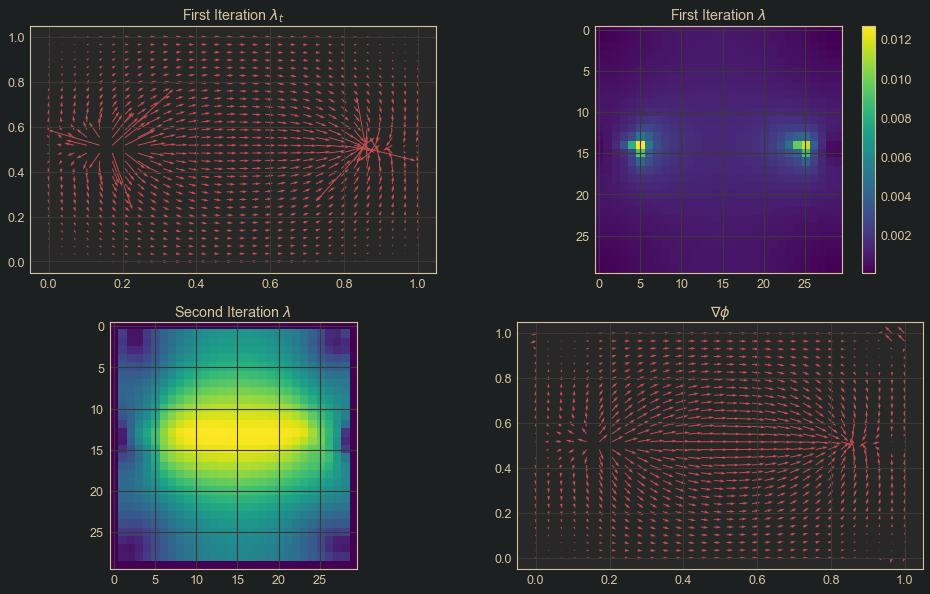

In [5]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[n//2,n//6] = 1
# Final Distribution
sigma = np.zeros((n,n))
sigma[n//2,5*n//6] = 1

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

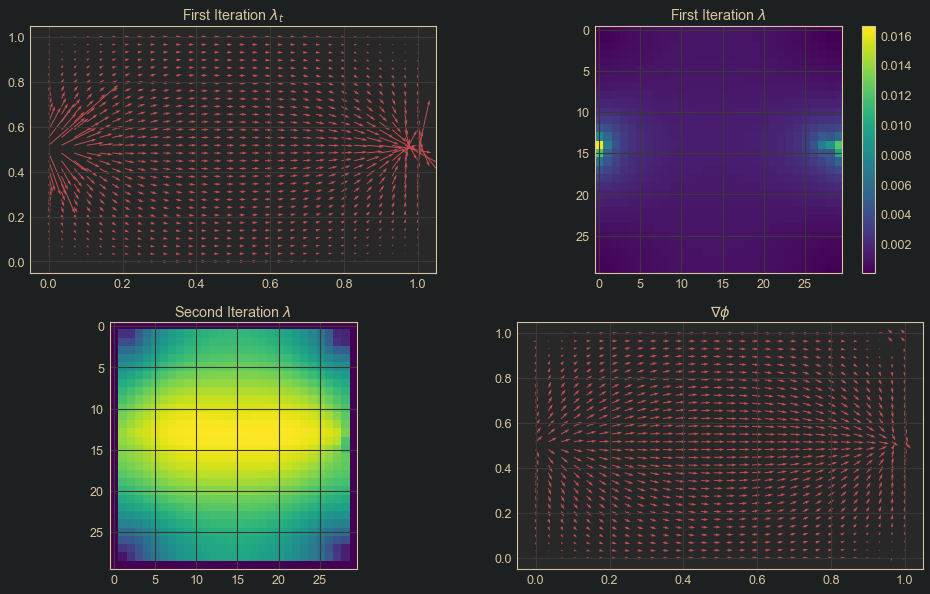

In [6]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[n//2,0] = 1
# Final Distribution
sigma = np.zeros((n,n))
sigma[n//2,-1] = 1

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

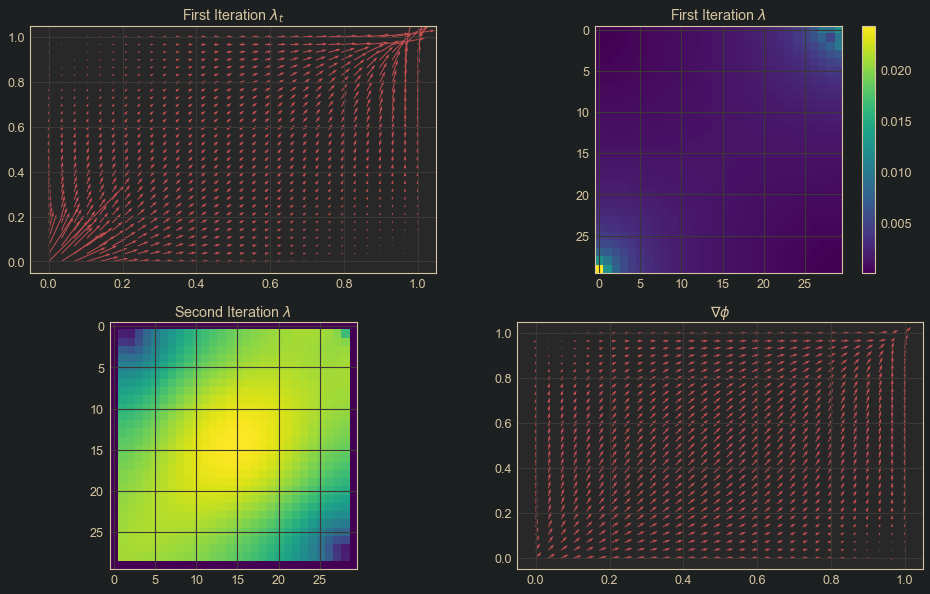

In [7]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[0,0] = 1
# Final Distribution
sigma = np.zeros((n,n))
sigma[-1,-1] = 1

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True )

## Multiple Sources/Sinks

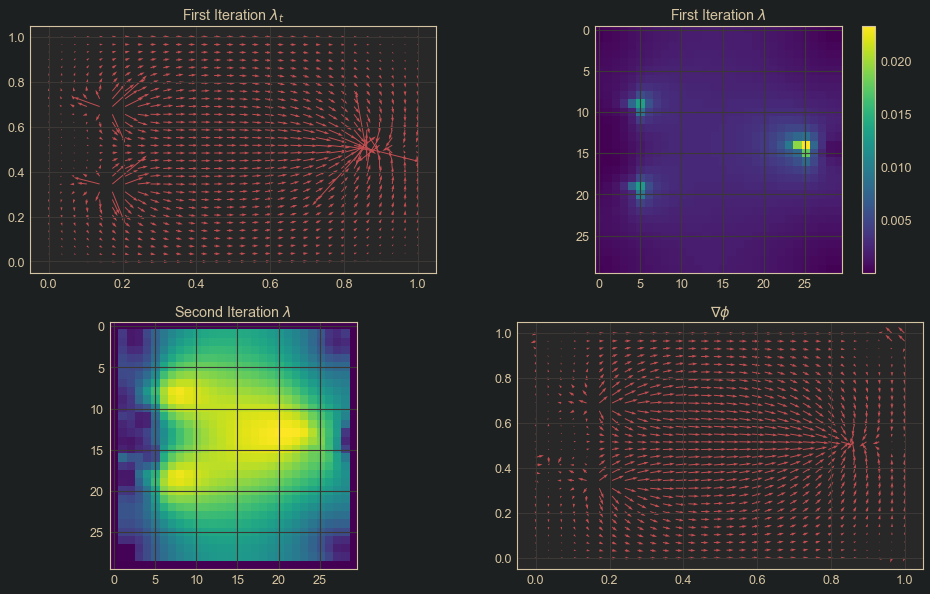

In [8]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[n//3,n//6] = 1
rho[2*n//3,n//6] = 1
# Final Distribution
sigma = np.zeros((n,n))
sigma[n//2,5*n//6] = 2

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

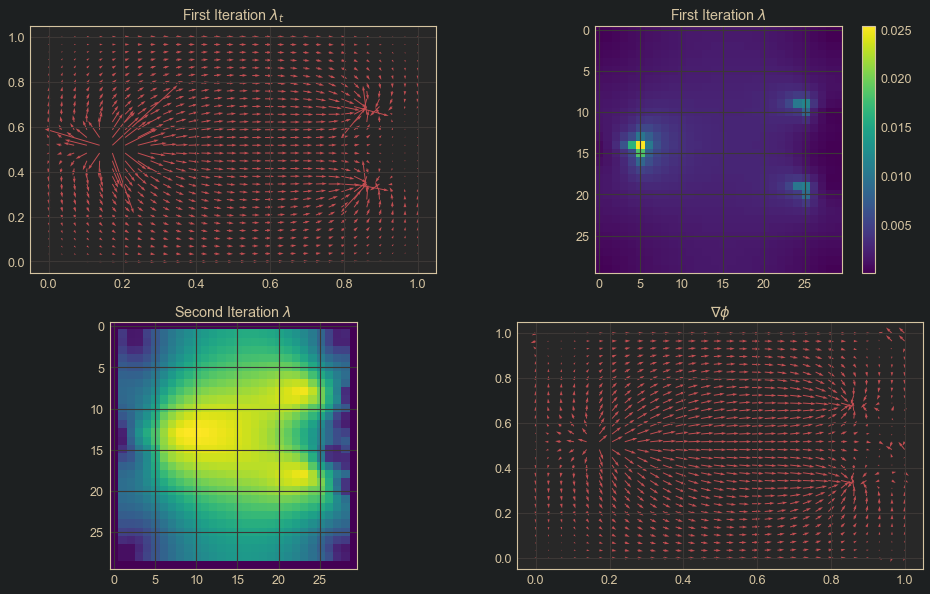

In [9]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[n//2,n//6] = 2
# Final Distribution
sigma = np.zeros((n,n))
sigma[2*n//3,5*n//6] = 1
sigma[n//3,5*n//6] = 1

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

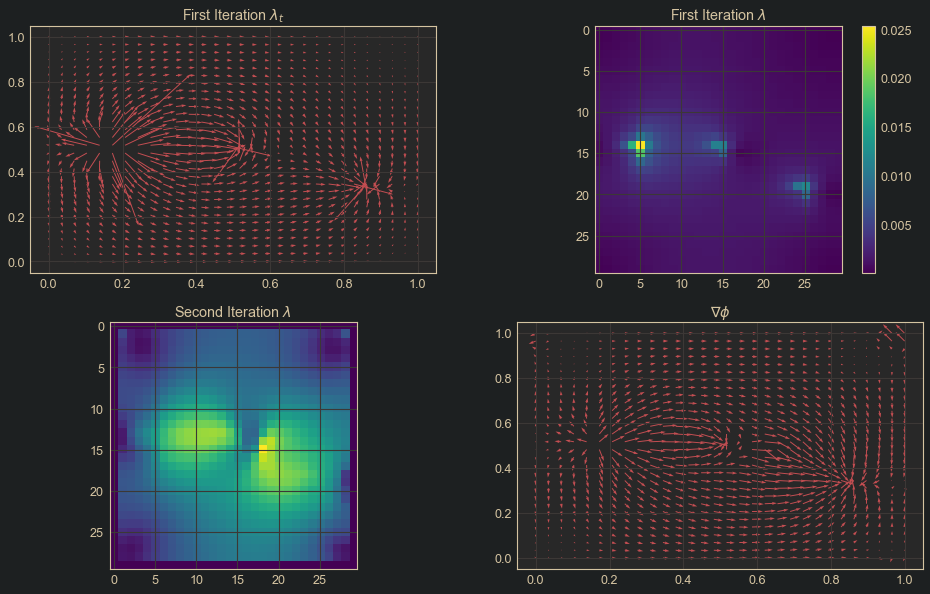

In [10]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[n//2,n//6] = 2
# Final Distribution
sigma = np.zeros((n,n))
sigma[n//3,5*n//6] = 1
sigma[n//2,3*n//6] = 1

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

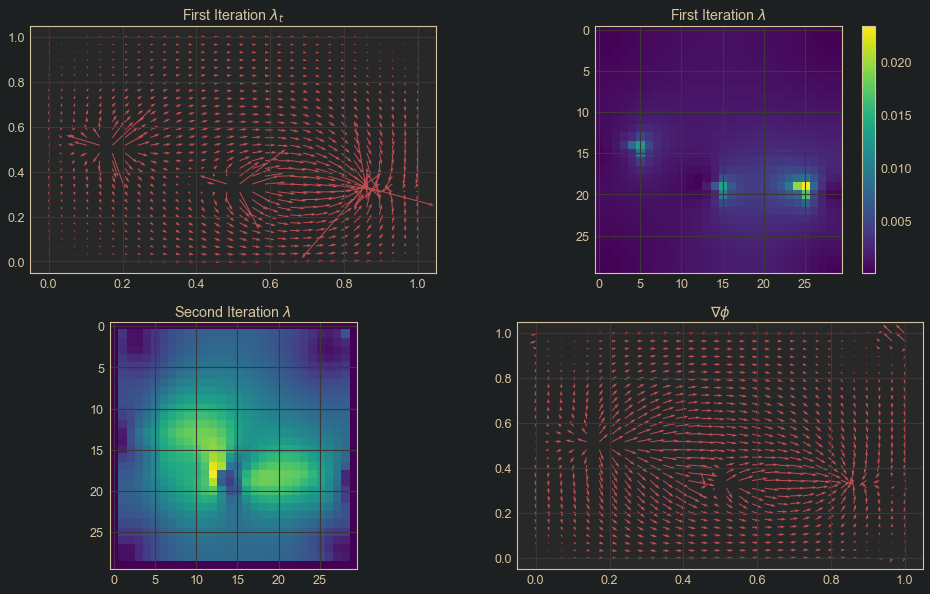

In [11]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[n//2,n//6] = 1
rho[n//3,3*n//6] = 1
# Final Distribution
sigma = np.zeros((n,n))
sigma[n//3,5*n//6] = 2

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

In [12]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[n//2,n//6] = 1
rho[n//3,3*n//6] = 1
# Final Distribution
sigma = np.zeros((n,n))
sigma[n//3,5*n//6] = 1
sigma[2*n//3,5*n//6] = 1

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler')

## Continuous Distributions

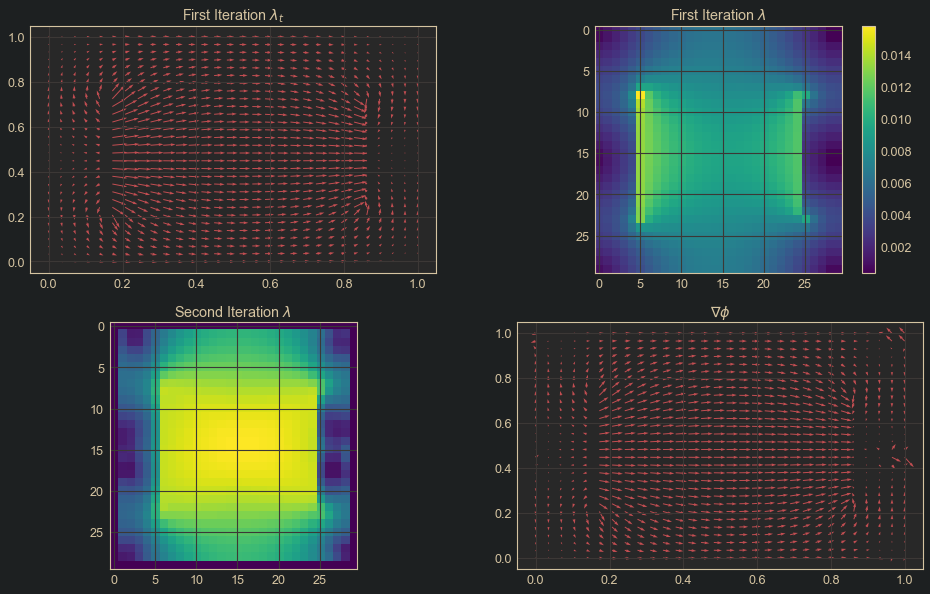

In [13]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[n//4:3*n//4,n//6] = np.sin(np.pi*xx[n//4:3*n//4,n//6])
# Final Distribution
sigma = np.zeros((n,n))
sigma[n//4:3*n//4,5*n//6] = np.sin(np.pi*xx[n//4:3*n//4,5*n//6])

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

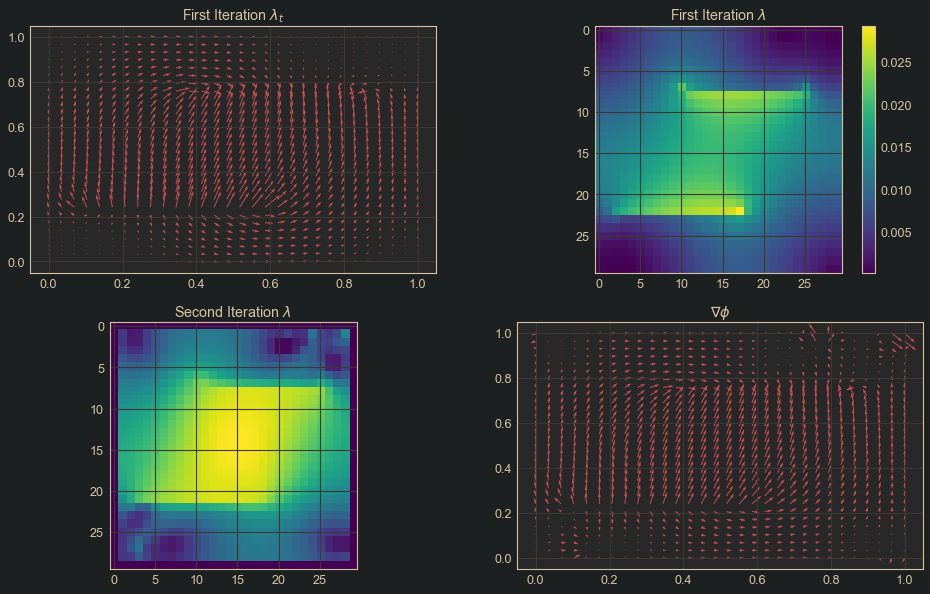

In [14]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[n//4,n//4-4:3*n//4-4] = np.sin(np.pi*xx[n//4,n//4:3*n//4])
# Final Distribution
sigma = np.zeros((n,n))
sigma[3*n//4,n//4+4:3*n//4+4] = np.sin(np.pi*xx[3*n//4,n//4:3*n//4])

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

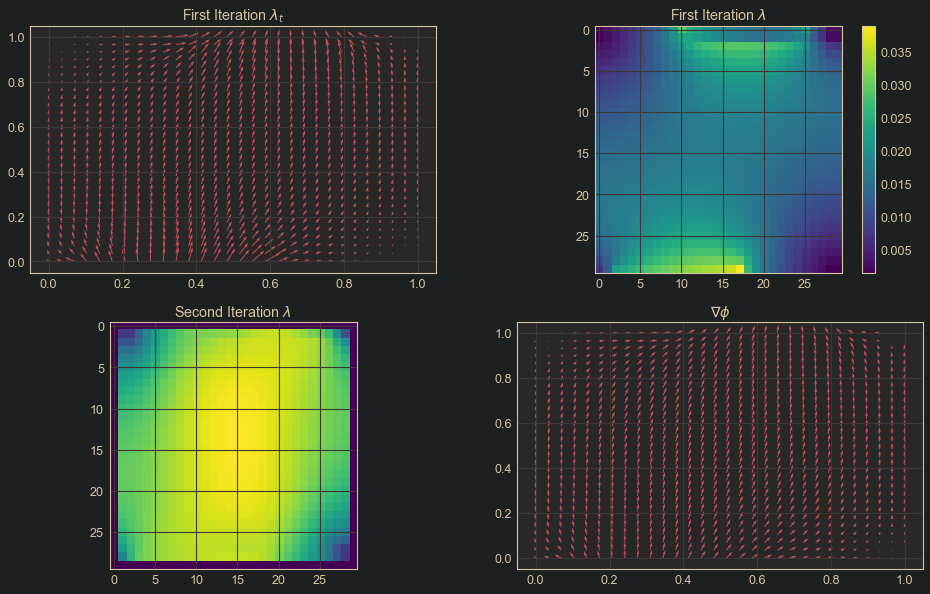

In [15]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[0,n//4-4:3*n//4-4] = np.sin(np.pi*xx[0,n//4:3*n//4])
# Final Distribution
sigma = np.zeros((n,n))
sigma[-1,n//4+4:3*n//4+4] = np.sin(np.pi*xx[-1,n//4:3*n//4])

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

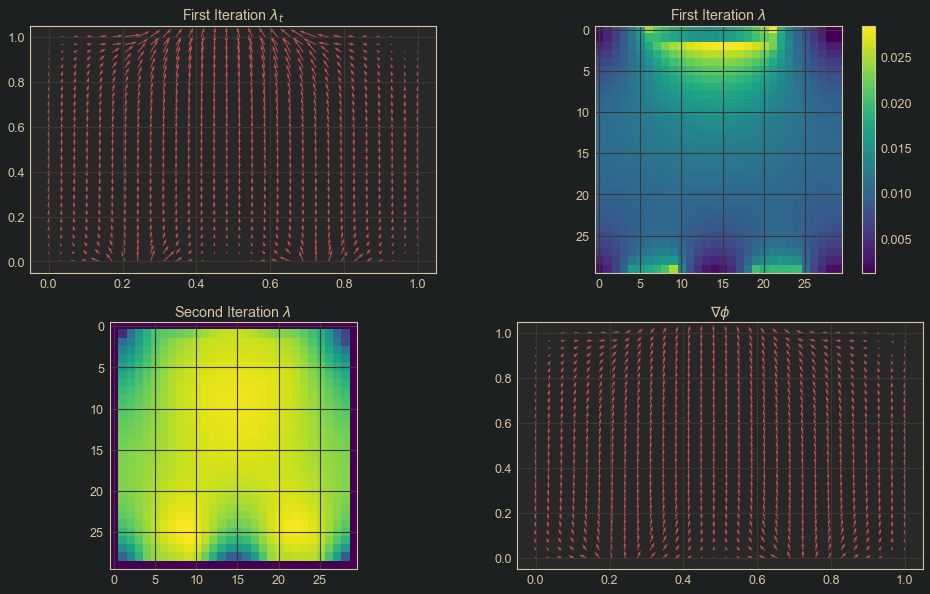

In [16]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[0,n//6:2*n//6] = np.sin(np.pi*xx[0,n//6:2*n//6])
rho[0,4*n//6:5*n//6] = np.sin(np.pi*xx[0,4*n//6:5*n//6])
# Final Distribution
sigma = np.zeros((n,n))
sigma[-1,n//4:3*n//4] = np.sin(np.pi*xx[-1,n//4:3*n//4])

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

### Mixed

34.0 33.99999999999999


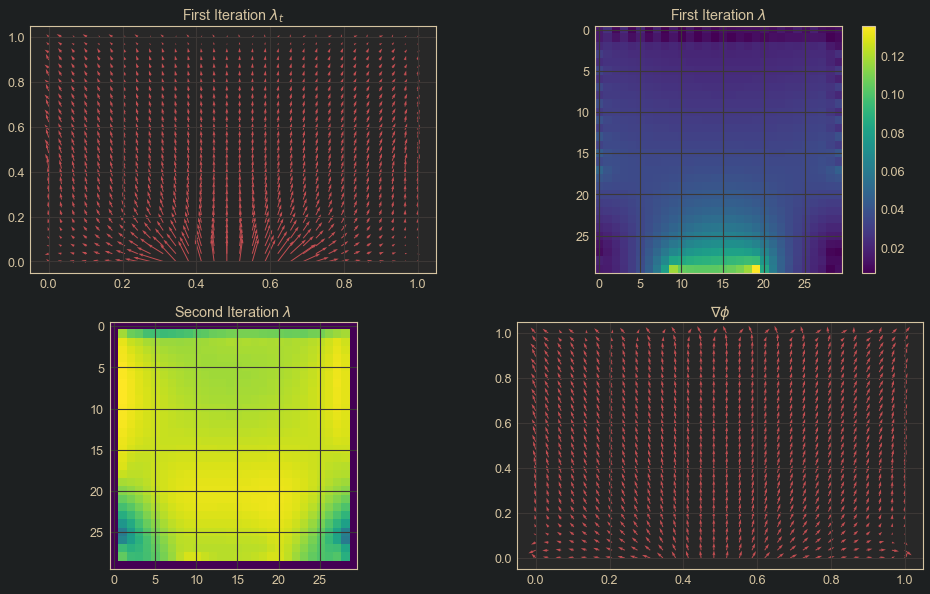

In [17]:
#GRID
n = m = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[0,n//3:2*n//3] = 3.4*np.ones(n//3)
# Final Distribution
sigma = np.zeros((n,n))
for i in range(n//3):
    sigma[-i*2+1,0] = 1
    sigma[-i*2+1,-1]=1
for i in range(n//2):
    sigma[-1,i*2+1]=1

print(sum(sum(sigma)),sum(sum(rho)))

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)

6.0 6.0


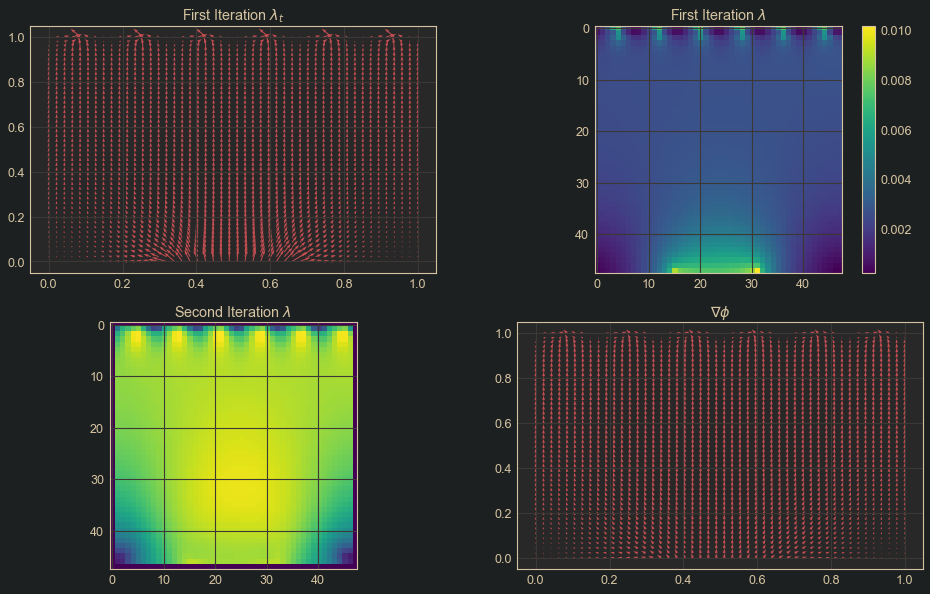

In [18]:
#GRID
n = m = 6*8
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[0,n//3:2*n//3] = 3/8*np.ones(n//3)
# Final Distribution
sigma = np.zeros((n,n))
for i in range(n//8):
    sigma[-1,i*8+4]=1

print(sum(sum(sigma)),sum(sum(rho)))

#VARIABLES
Gc=np.ones((n,m))

#SOLVE
lam,phi,Gphi = lambdaApprox(xx, yy, rho, sigma, Gc, diff='ForwardEuler', vis=True)